# Tarea - Ajuste de curvas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [ ]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

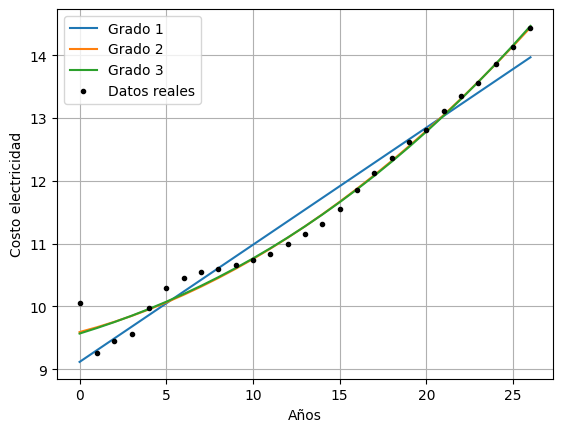

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

data = np.array([10.051101,9.259127,9.444813,9.557723,9.977324,10.298326,
                 10.447217,10.550506,10.590784,10.657418,10.743085,10.831965,
                 10.988435,11.153055,11.313326,11.557165,11.860136,12.122511,
                 12.356448,12.611391,12.814569,13.111372,13.357134,13.559012,
                 13.85861,14.135924,14.436149])

x = np.arange(len(data))
y = data

def fhat(beta,x):
  X = np.array([x**i for i in range(len(beta))]).T
  return X@beta

def error(beta,x,y):
  return np.sum((y-fhat(beta,x))**2)

#Grad 1-3
sol = []
for i in range(1,4):
  beta0 = np.random.rand(i+1)
  sol.append(opt.minimize(error,beta0,args=(x,y)))
  plt.plot(x,fhat(sol[-1].x,x),label='Grado '+str(i))

plt.plot(x,y,'ok',ms=3,label='Datos reales')
plt.xlabel('Años')
plt.ylabel('Costo electricidad')
plt.legend()
plt.grid()
plt.show()


---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [ ]:
data = pd.read_csv('population_data.csv')

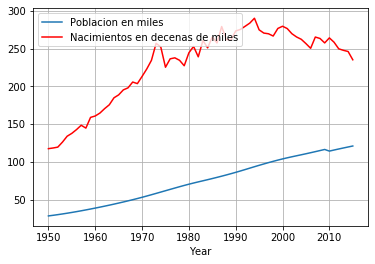

In [ ]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

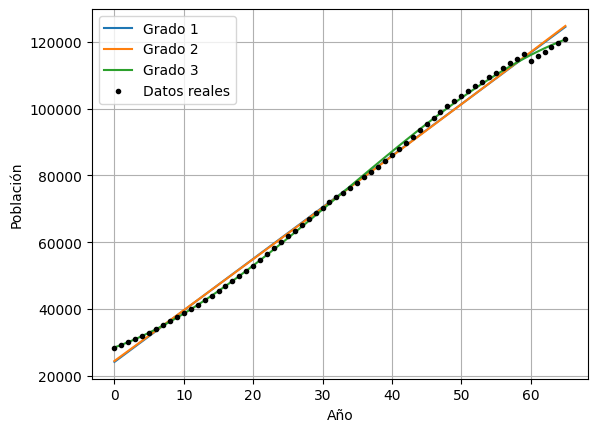

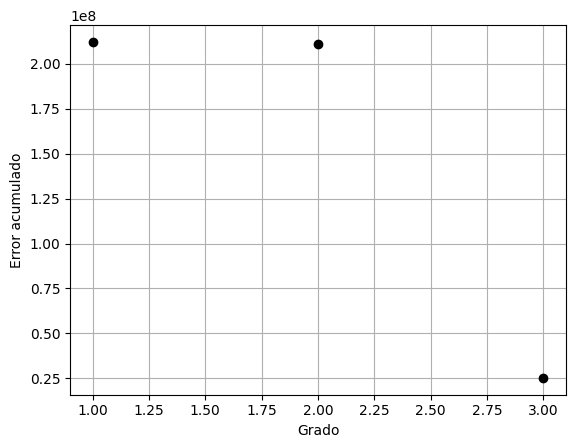

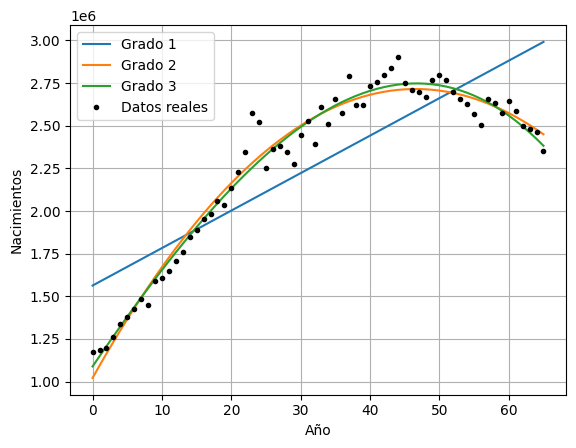

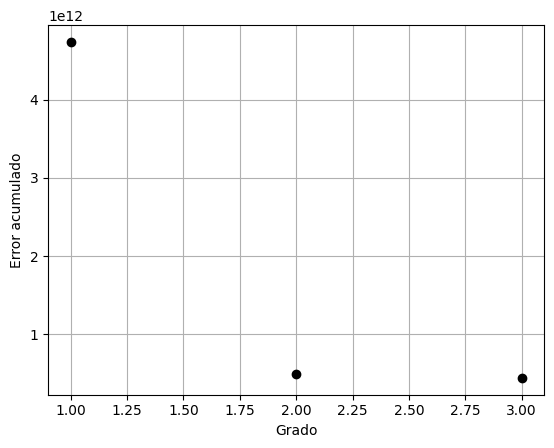

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

data = pd.read_csv('population_data.csv')

x = data.values[:,0] - 1950
y1 = data.values[:,1]       #Población
y2 = data.values[:,2]       #Nacimientos

def fhat(beta,x):
  X = np.array([x**i for i in range(len(beta))]).T
  return X@beta

def error(beta,x,y):
  return np.sum((y-fhat(beta,x))**2)

#Población
sol1=[]
for i in range(1,4):
  beta0=np.random.rand(i+1)
  sol1.append(opt.minimize(error,beta0,args=(x,y1)))
  plt.plot(x,fhat(sol1[-1].x,x),label='Grado '+str(i))
plt.plot(x,y1,'ok',ms=3,label='Datos reales')
plt.xlabel('Año'); plt.ylabel('Población'); plt.legend(); plt.grid(); plt.show()

#E. acumulado población
for i in range(len(sol1)):
  plt.plot(i+1,sol1[i].fun,'ok')
plt.xlabel('Grado'); plt.ylabel('Error acumulado'); plt.grid(); plt.show()

#Nacimientos
sol2=[]
for i in range(1,4):
  beta0=np.random.rand(i+1)
  sol2.append(opt.minimize(error,beta0,args=(x,y2)))
  plt.plot(x,fhat(sol2[-1].x,x),label='Grado '+str(i))
plt.plot(x,y2,'ok',ms=3,label='Datos reales')
plt.xlabel('Año'); plt.ylabel('Nacimientos'); plt.legend(); plt.grid(); plt.show()

#E. acumulado nacimientos
for i in range(len(sol2)):
  plt.plot(i+1,sol2[i].fun,'ok')
plt.xlabel('Grado'); plt.ylabel('Error acumulado'); plt.grid(); plt.show()
